# Shannon's Entropy

- Information Entropy or Shannon's entropy  is a measure of the uncertainty or randomness in a set of data. It quantifies the amount of uncertainty (or surprise) involved in the value of a random variable or the outcome of a random process.

- Its significance in the decision tree is that it allows us to estimate the impurity (possibility of obtaining unknown unexpected values) or heterogeneity (similarity in outcomes) of the target variable

- ie how occasionally it gives a particular result, the lesser probability of getting that exact result, the lesser suprised we are when we don't get that result.

- The entropy of a random variable is highest when it is completely random and low when it is highly predictable. High entropy means that the dataset has a lot of variability. Low entropy means most of the values of the dataset repeat (and therefore are redundant)

- At a conceptual level, Shannon's Entropy is simply the "amount of information" in a variable, that translates to the amount of storage (e.g. number of bits) required to store the variable

- This is because if a variable can give a variety of results, it means it has high entropy and we have to store different actions for those results, which can intuitively be understood to correspond to the amount of information in that variable.

Following is the formula for Information Entropy:

$$

H(X) = - \sum_{x} p(x) \log_{2} p(x)

$$
<center>Entropy describes one probability distribution</center>

$$
H(X) = - \sum_{x} p(x) \log_{2} q(x)
$$
<center> Cross Entropy describes the relationship b/w 2 probability distributions</center>



Where H(X) is the entropy of the random variable X, p(x) is the probability of event x occurring, and the summation is taken over all possible outcomes x. The logarithm is taken to base 2, which gives the entropy in units of bits

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x=[0.25, .75] # discrete sample space for an event X

H=0
for p in x:
    H-=p*np.log(p)

print('correct entropy: '+ str(H))

# also correct, written out of N=2 events

H=-(p*np.log(p)+(1-p)*np.log(1-p))
print('Correct entropy: '+str(H))

correct entropy: 0.5623351446188083
Correct entropy: 0.5623351446188083


## Cross Entropy

In [ ]:
#   Note: all probabilities must sum to 1 in a sample space

p=[1,0] # sum=1
q=[.25,.75] # sum=1

H=0
for i in range(len(p)):
    H-=p[i]*np.log(q[i])

print('Cross entropy: '+str(H))

Cross entropy: 1.3862943611198906


In [ ]:
# also correct, written out for N=2 events
H-=(p[0]*np.log(q[0])+p[1]*np.log(q[1]))

print('Correct entropy: '+str(H))

#   simplification
H=-np.log(q[0])
print('Manually simplified ')

## Differences in Entropy and Variance
- Entropy is non-linear and makes no assumption about the distribution
- Variance depends on the validity of the mean therefore is appropriate for roughly normal data.

In [ ]:
# now using pytorch
import torch
import torch.nn.functional as func

In [ ]:
q_tensor=torch.Tensor(q)
p_tensor=torch.Tensor(p)


#  This function is sensitive to order of the inputs and doesn't work with numpy so well, so we have to define p and q as tensors and can't use the numpy array p and q directly

func.binary_cross_entropy(q_tensor, p_tensor)

tensor(1.3863)

/var/folders/5k/k70qf4916qg33hlh5mv8hkxc0000gn/T/ipykernel_47987/58059951.py:4: RuntimeWarning: divide by zero encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)
/var/folders/5k/k70qf4916qg33hlh5mv8hkxc0000gn/T/ipykernel_47987/58059951.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


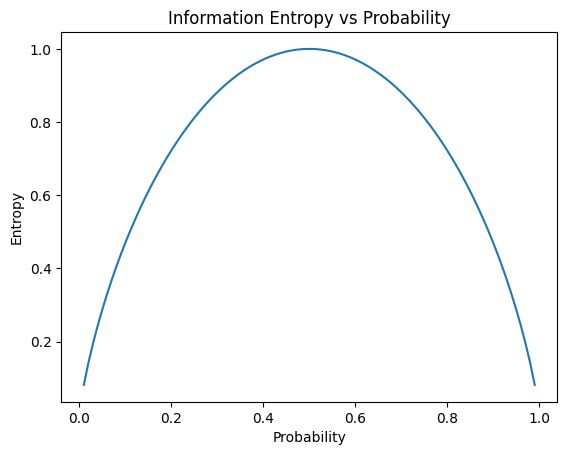

In [ ]:
# Let's plot how the entropy is distributed with respect to probability

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

probabilities = np.linspace(0, 1, num=100) # has values from 0 to 1, with 100 equal intervals
entropies = [entropy(p) for p in probabilities]

plt.plot(probabilities, entropies)
plt.xlabel("Probability")
plt.ylabel("Entropy")
plt.title("Information Entropy vs Probability")
plt.show()
